# Import Libraries

In [1]:
import os
import re
import cv2
import pickle
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualize Data

In [2]:
animals_dir = 'D:/AnimalsClassification/dataset/'
train_dir = os.path.join(animals_dir, 'train')
val_dir = os.path.join(animals_dir, 'val')

Number of training samples: 13473
Number of validation samples: 1497


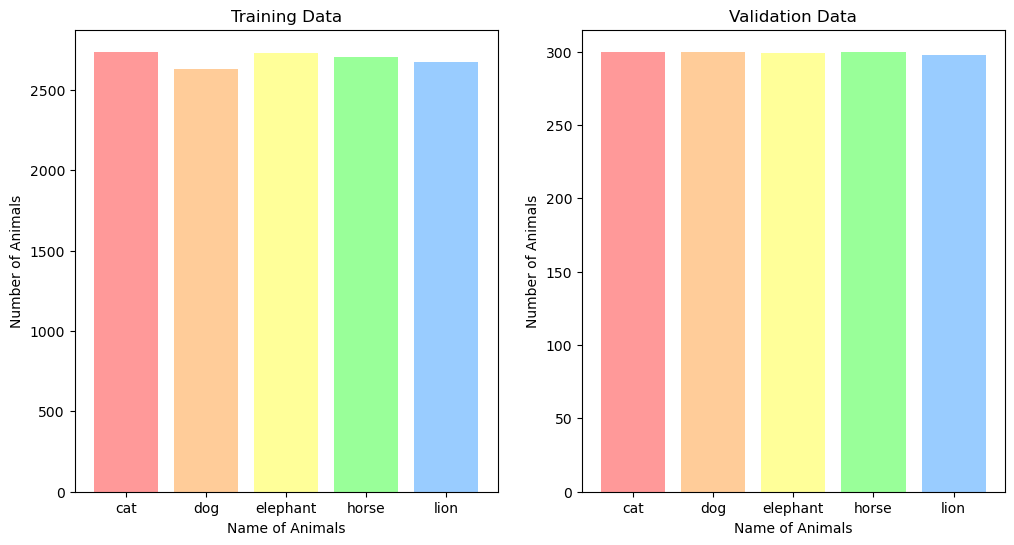

In [3]:
folders_train = []
file_counts_train = []
folders_val = []
file_counts_val = []

num_train = 0
num_val = 0

# Get statistics for training data
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        folders_train.append(folder)
        file_counts_train.append(len(os.listdir(folder_path)))
        num_train += len(os.listdir(folder_path))

# Get statistics for validation data
for folder in os.listdir(val_dir):
    folder_path = os.path.join(val_dir, folder)
    if os.path.isdir(folder_path):
        folders_val.append(folder)
        file_counts_val.append(len(os.listdir(folder_path)))
        num_val += len(os.listdir(folder_path))

print('Number of training samples:', num_train)
print('Number of validation samples:', num_val)

colors = ["#FF9999", "#FFCC99", "#FFFF99", "#99FF99", "#99CCFF"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
color1 = "#00CCCC"
color2 = "#FF9999"

# Plot bar chart for training data
ax1.bar(folders_train, file_counts_train, color=colors)
ax1.set_xlabel('Name of Animals')
ax1.set_ylabel('Number of Animals')
ax1.set_title('Training Data')

# Plot bar chart for validation data
ax2.bar(folders_val, file_counts_val, color=colors)
ax2.set_xlabel('Name of Animals')
ax2.set_ylabel('Number of Animals')
ax2.set_title('Validation Data')
plt.show()


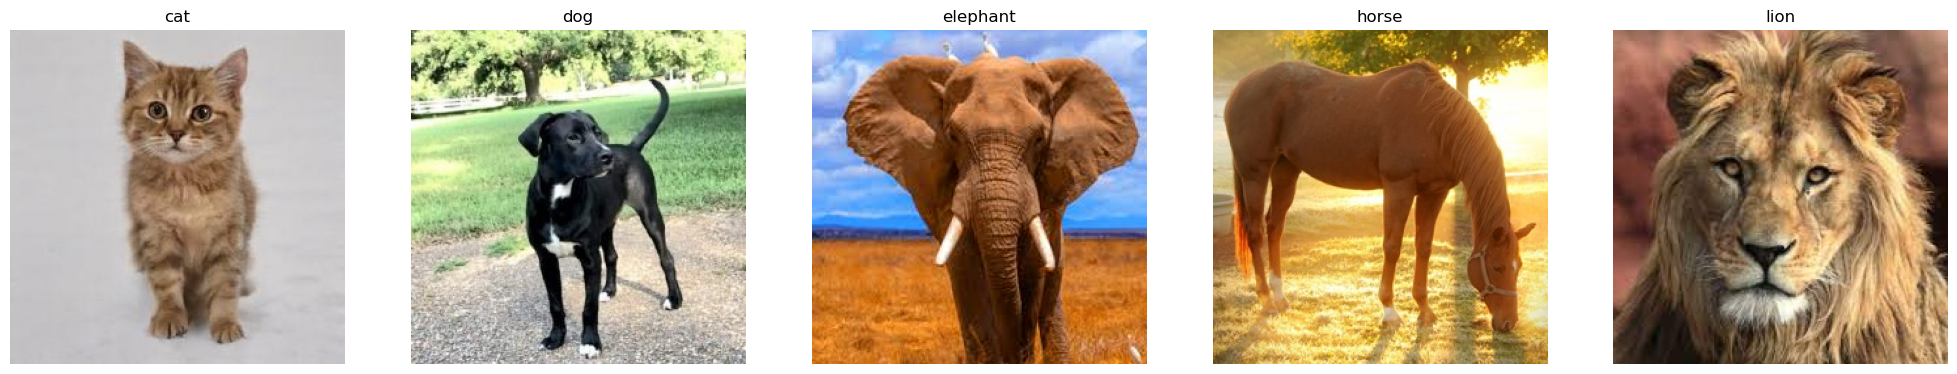

In [4]:
i = 1
plt.figure(figsize=(25, 10))

for img in os.listdir("D:/AnimalsClassification/dataset/inf"):
    img_path = os.path.join("D:/AnimalsClassification/dataset/inf", img)
    image = cv2.imread(img_path)

    plt.subplot(1, 5, i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(img.split(".")[0])
    plt.axis("off")
    i += 1
plt.show()

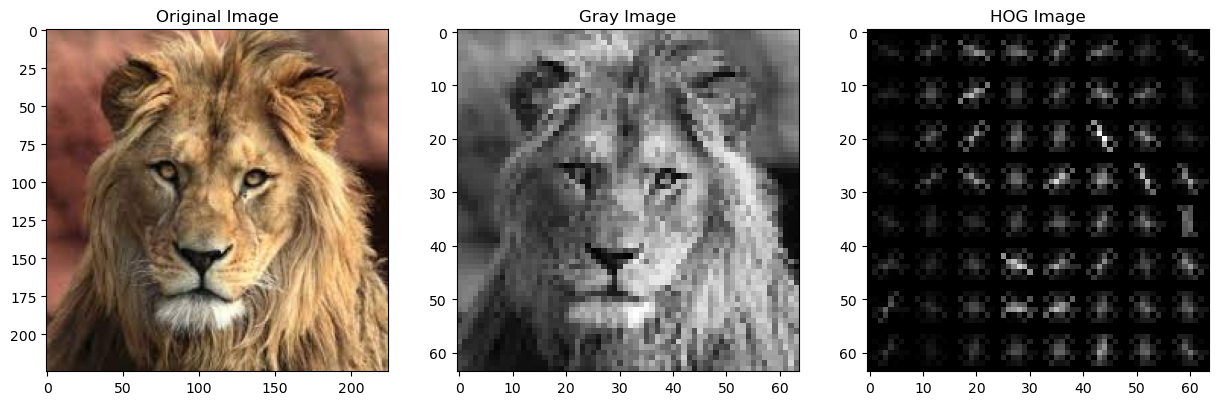

In [5]:
img_path = "D:/AnimalsClassification/dataset/inf/lion.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

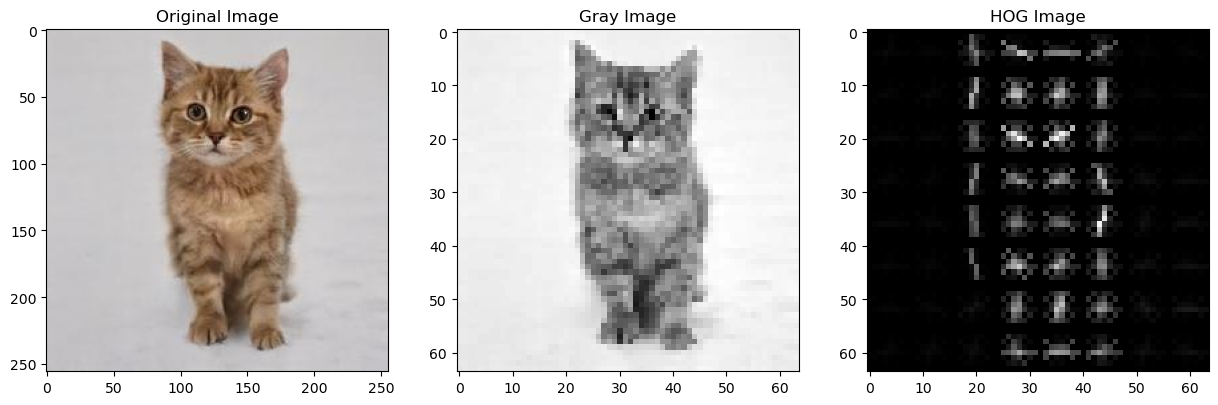

In [6]:
img_path = "D:/AnimalsClassification/dataset/inf/cat.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()
plt.show()

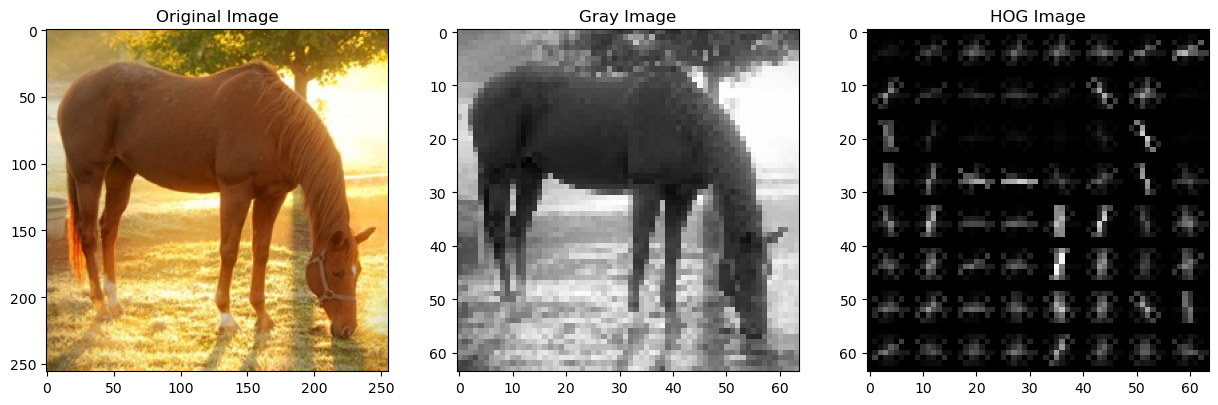

In [7]:
img_path = "D:/AnimalsClassification/dataset/inf/horse.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

# HOG Feature Extraction

Feature extraction using HOG with orientations=36

In [8]:
def load_images(folder_path):
    features = []
    labels = []

    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = np.array(image).astype('uint8')
        image = cv2.resize(image, (64, 64))
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hog_features = hog(grey_image, orientations=36, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

        features.append(hog_features)
        labels.append( os.path.basename(folder_path))

    return features, labels


# Load Images and Generate Train/Val/Test

In [9]:
list_folders_train = os.listdir(train_dir)
list_folders_val = os.listdir(val_dir)

In [10]:
X_train_ = []
y_train_ = []
X_test_ = []
y_test_ = []

for folder_train in list_folders_train:
    folder_path_train = os.path.join(train_dir, folder_train)
    features, labels = load_images(folder_path_train)
    X_train_.extend(features)
    y_train_.extend(labels)

for folder_val in list_folders_val:
    folder_path_val = os.path.join(val_dir, folder_val)
    features, labels = load_images(folder_path_val)
    X_test_.extend(features)
    y_test_.extend(labels)


In [11]:
X_train = np.array(X_train_)
y_train = np.array(y_train_)
X_test = np.array(X_test_)
y_test = np.array(y_test_)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13473, 7056)
(13473,)
(1497, 7056)
(1497,)


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9431, 7056)
(4042, 7056)
(1497, 7056)


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [16]:
print("Dimensions of X_train: ", X_train.shape)
print("Dimensions of y_train: ", y_train.shape)
print("Dimensions of X_val: ", X_val.shape)
print("Dimensions of y_val: ", y_val.shape)
print("Dimensions of X_test: ", X_test.shape)
print("Dimensions of y_test: ", y_test.shape)

Dimensions of X_train:  (9431, 7056)
Dimensions of y_train:  (9431,)
Dimensions of X_val:  (4042, 7056)
Dimensions of y_val:  (4042,)
Dimensions of X_test:  (1497, 7056)
Dimensions of y_test:  (1497,)


In [17]:
# Đếm số lượng mỗi nhãn trong tập train
unique_labels, label_counts = np.unique(y_train_encoded, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    print(f"Số lượng {label}: {count}")


Số lượng 0: 1904
Số lượng 1: 1843
Số lượng 2: 1941
Số lượng 3: 1887
Số lượng 4: 1856


In [18]:
# Đếm số lượng mỗi nhãn trong tập val
unique_labels, label_counts = np.unique(y_val_encoded, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    print(f"Số lượng {label}: {count}")


Số lượng 0: 833
Số lượng 1: 784
Số lượng 2: 788
Số lượng 3: 818
Số lượng 4: 819


In [19]:
# Đếm số lượng mỗi nhãn trong tập test
unique_labels, label_counts = np.unique(y_test_encoded, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    print(f"Số lượng {label}: {count}")


Số lượng 0: 300
Số lượng 1: 300
Số lượng 2: 299
Số lượng 3: 300
Số lượng 4: 298


In [20]:
# PCA giảm chiều dữ liệu
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [21]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_val_pca.shape)

(9431, 50)
(1497, 50)
(4042, 50)


# SVM 

In [22]:
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score

def SVM(X_train, X_test, y_train, y_test, kernel='rbf', C=1):
    svm = SVC(kernel = kernel, C = C).fit(X_train, y_train)
    svm_predictions = svm.predict(X_test)
    print("Validation Set")
    print("accuracy_score: ", accuracy_score(y_test, svm_predictions))
    print("precision_score: ", precision_score(y_test, svm_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, svm_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, svm_predictions, average='weighted'))
    print(classification_report(y_test, svm_predictions))
    return svm

svm = SVM(X_train_pca, X_val_pca, y_train_encoded, y_val_encoded, kernel='rbf', C=1)

Validation Set
accuracy_score:  0.7716476991588322
precision_score:  0.769996619189529
recall_score:  0.7716476991588322
f1_score:  0.7705148290559658
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       833
           1       0.90      0.91      0.91       784
           2       0.67      0.63      0.65       788
           3       0.67      0.71      0.69       818
           4       0.67      0.65      0.66       819

    accuracy                           0.77      4042
   macro avg       0.77      0.77      0.77      4042
weighted avg       0.77      0.77      0.77      4042



In [23]:
y_pred_test = svm.predict(X_test_pca)
print("Test Set")
print("accuracy_score: ", accuracy_score(y_test_encoded, y_pred_test))
print("precision_score: ", precision_score(y_test_encoded, y_pred_test, average='weighted'))
print("recall_score: ", recall_score(y_test_encoded, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test_encoded, y_pred_test, average='weighted'))

Test Set
accuracy_score:  0.8062792251169004
precision_score:  0.8050720310244686
recall_score:  0.8062792251169004
f1_score:  0.8046049963682345


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, X_test, y_train, y_test, n_neighbors=6):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    knn_predictions=knn.predict(X_test)
    print(f"n_neighbors = {n_neighbors}")
    print("accuracy_score: ", accuracy_score(y_test, knn_predictions))
    print("precision_score: ", precision_score(y_test, knn_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, knn_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, knn_predictions, average='weighted'))
    print(classification_report(y_test, knn_predictions))
    return knn

# best_accuracy = 0
# best_n_neighbors = 0
# for n_neighbors in range(1, 30):
#     knn = KNN(X_train_pca, X_val_pca, y_train, y_val, n_neighbors=n_neighbors)
#     print(f"n_neighbors = {n_neighbors}, accuracy train = {knn.score(X_train_pca, y_train)}, accuracy val = {knn.score(X_val_pca, y_val)}")
#     if knn.score(X_val_pca, y_val) > best_accuracy:
#         best_accuracy = knn.score(X_val_pca, y_val)
#         best_n_neighbors = n_neighbors
# print("Best n_neighbors: ", best_n_neighbors)
# print("Best accuracy: ", best_accuracy)

knn = KNN(X_train_pca, X_val_pca, y_train, y_val, n_neighbors=26)

n_neighbors = 26
accuracy_score:  0.7090549233052944
precision_score:  0.7096063857999697
recall_score:  0.7090549233052944
f1_score:  0.701122690521553
              precision    recall  f1-score   support

         cat       0.86      0.97      0.91       833
         dog       0.85      0.87      0.86       784
    elephant       0.64      0.47      0.54       788
       horse       0.54      0.73      0.62       818
        lion       0.65      0.50      0.57       819

    accuracy                           0.71      4042
   macro avg       0.71      0.71      0.70      4042
weighted avg       0.71      0.71      0.70      4042



In [25]:
y_pred_test = knn.predict(X_test_pca)
print("Test Set")
print("accuracy_score: ", accuracy_score(y_test, y_pred_test))
print("precision_score: ", precision_score(y_test, y_pred_test, average='weighted'))
print("recall_score: ", recall_score(y_test, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test, y_pred_test, average='weighted'))

Test Set
accuracy_score:  0.7254509018036072
precision_score:  0.7310295199487379
recall_score:  0.7254509018036072
f1_score:  0.7178767782972479


# Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X_train, X_test, y_train, y_test, n_estimators=100):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=25).fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    print("Validation Set")
    print("accuracy_score: ", accuracy_score(y_test, rf_predictions))
    print("precision_score: ", precision_score(y_test, rf_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, rf_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, rf_predictions, average='weighted'))
    return rf

rf = RandomForest(X_train_pca, X_val_pca, y_train, y_val, n_estimators=100)

Validation Set
accuracy_score:  0.7093023255813954
precision_score:  0.7063825793774039
recall_score:  0.7093023255813954
f1_score:  0.7066291227416341


In [27]:
y_pred_test = rf.predict(X_test_pca)
print("Test Set")
print("accuracy_score: ", accuracy_score(y_test, y_pred_test))
print("precision_score: ", precision_score(y_test, y_pred_test, average='weighted'))
print("recall_score: ", recall_score(y_test, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test, y_pred_test, average='weighted'))

Test Set
accuracy_score:  0.7414829659318637
precision_score:  0.7383454373326263
recall_score:  0.7414829659318637
f1_score:  0.7372587963032794


# Demo


In [28]:
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = np.array(image).astype('uint8')
    image = cv2.resize(image, (64, 64))
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features = hog(grey_image, orientations=36, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
    hog_features = np.array(hog_features).reshape(1, -1)
    hog_features = scaler.transform(hog_features)
    hog_features = pca.transform(hog_features)
    return hog_features

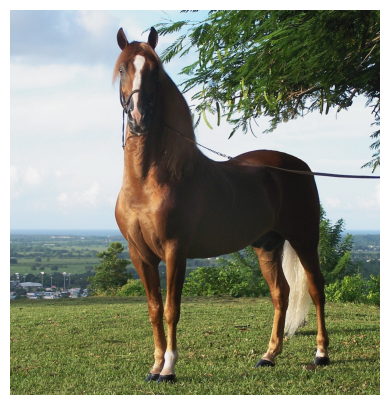

SVM - Predicted Label:  horse
KNN - Predicted Label:  horse
RF - Predicted Label:  horse


In [29]:
img_path = "D:/AnimalsClassification/test_image/horse2.jpg"
plt.figure(figsize=(15, 5))
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.show()

hog_features = extract_features(img_path)

y_pred_svm = svm.predict(hog_features)
print("SVM - Predicted Label: ", encoder.inverse_transform(y_pred_svm)[0])

y_pred_knn = knn.predict(hog_features)
print("KNN - Predicted Label: ", y_pred_knn[0])

y_pred_rf = rf.predict(hog_features)
print("RF - Predicted Label: ", y_pred_rf[0])